# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Import the dataset as dataframe

In [ ]:
df=pd.read_csv('Problem1_data.csv')
print(df.head(5))
df.drop('Unnamed: 0',axis=1,inplace=True)
df.tail(5)

   Unnamed: 0         timestamp  soc  voltage  current
0           0  12-12-2021 04:41   87     56.3      0.0
1           1  12-12-2021 04:41   87     56.3      0.0
2           2  12-12-2021 04:41   87     56.3      0.0
3           3  12-12-2021 04:43   87     56.3      0.0
4           4  12-12-2021 04:43   87     56.3      0.0


,timestamp,soc,voltage,current
81135,30-11-2021 04:54,95,57.9,0.0
81136,30-11-2021 04:54,95,57.8,0.0
81137,30-11-2021 04:56,95,57.8,0.0
81138,30-11-2021 04:59,95,57.8,0.0
81139,30-11-2021 04:59,95,57.8,0.0


In [ ]:
#shape of the dataset
df.shape

(81140, 4)

#Checking missing values


In [ ]:
df.isnull().sum()

,0
timestamp,0
soc,0
voltage,0
current,0


no missing values in the dataset

Sorting the dataset according to time

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%d-%m-%Y %H:%M")
df.sort_values(by='timestamp',inplace=True)
print(df.head())

                timestamp  soc  voltage  current
25801 1970-01-01 00:00:00    0      0.0      0.0
2657  1970-01-01 00:00:00    0      0.0      0.0
71955 2021-11-09 07:05:00   93     57.3      0.0
71954 2021-11-09 07:05:00   59     52.3      0.0
71957 2021-11-09 07:07:00   93     57.1      2.9


As we can see here that two values is from 1970 and then started from 2021, its may be an error because what was the value 51 year back will not affect, in electric vehicle. its an outlier for the dataset and also have the other values are 0 in these rows, so i have to remove them.

# Plotting Box Plot to see the outliers

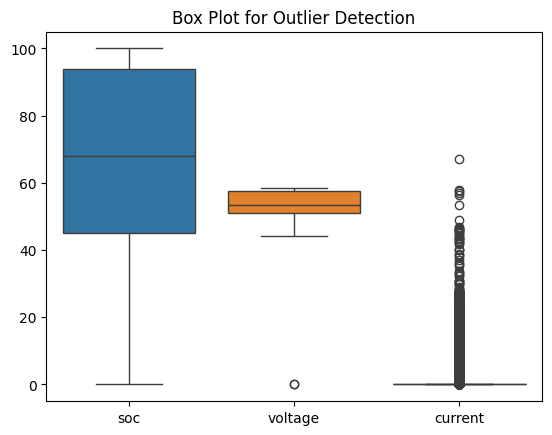

In [ ]:
sns.boxplot(data=df[['soc', 'voltage', 'current']])
plt.title("Box Plot for Outlier Detection")
plt.show()

We can clearly see the outliers in the plot

In [ ]:
df.shape

(81140, 4)

**Dropping the 2 rows having data of 1970 which is 0 , because its not giving any significant information**

In [ ]:
# Remove rows where 'timestamp' is '1970-01-01 00:00:00'
df = df[df['timestamp'] != "1970-01-01 00:00:00"]
# Display the first few rows after cleaning
df.head()

,timestamp,soc,voltage,current
71955,2021-11-09 07:05:00,93,57.3,0.0
71954,2021-11-09 07:05:00,59,52.3,0.0
71957,2021-11-09 07:07:00,93,57.1,2.9
71958,2021-11-09 07:07:00,93,57.1,0.0
71956,2021-11-09 07:07:00,93,56.7,12.8


In [ ]:
df.shape

(81138, 4)

# Checking for duplicate

In [ ]:
df.duplicated().sum()

33135

duplicate values will have the same values which will not have any significant information regarding the data so we will drop them.

**Droping the duplicate values**

In [ ]:
df.drop_duplicates(inplace=True)
df.head()

,timestamp,soc,voltage,current
71955,2021-11-09 07:05:00,93,57.3,0.0
71954,2021-11-09 07:05:00,59,52.3,0.0
71957,2021-11-09 07:07:00,93,57.1,2.9
71958,2021-11-09 07:07:00,93,57.1,0.0
71956,2021-11-09 07:07:00,93,56.7,12.8


In [ ]:
df.shape

(48003, 4)

In [ ]:
#checking null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48003 entries, 71955 to 11961
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  48003 non-null  datetime64[ns]
 1   soc        48003 non-null  int64         
 2   voltage    48003 non-null  float64       
 3   current    48003 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.8 MB


# Checking stats of the dataset

In [ ]:
df.describe()

,timestamp,soc,voltage,current
count,48003,48003.000000,48003.000000,48003.000000
mean,2021-12-20 19:58:37.592650496,66.922151,53.770466,2.237152
min,2021-11-09 07:05:00,0.000000,44.100000,0.000000
25%,2021-11-29 00:53:00,45.000000,50.900000,0.000000
50%,2021-12-19 06:27:00,68.000000,53.200000,0.000000
75%,2022-01-12 05:42:00,93.000000,57.400000,0.500000
max,2022-01-31 17:12:00,100.000000,58.600000,67.100000
std,NaN,24.405035,3.141847,5.160074


#Insights
**Related to SOC**
1. 66.92% indicates that, on an average, the battery is moderately charged.
2. Standard deviation of 24.4 shows that SOC values are quite spread out, showing diverse battery usage.
3. Median is approximately closer to the mean shows that the distribution is somewhat normal.

**Related to voltage**
1. Low stanard deviation about 3.14 shows that vlotage is relatively stable.
2. Median is approximately closer to the mean shows that the distribution is somewhat normal as in soc.

**Related to current**
1. Standard deviation is high (5.16) shows current varies significantly.

# Detecting outliers

In [ ]:
#function for detecting outlier by IQR
def det_out(column):
  # Convert the column to numeric
  df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate Q1, Q3, and IQR for the column
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

# Calculating lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

# Identifing outliers
  outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

# Creating a DataFrame containing only the outliers
  df_outliers = df[outliers]

# Printing results
  return print(f"Number of outliers in column '{column}': {outliers.sum()}"),print("Outlier rows:"), print(df_outliers)

In [ ]:
print(det_out('soc'))
print(det_out('voltage'))
print(det_out('current'))

Number of outliers in column 'soc': 0
Outlier rows:
Empty DataFrame
Columns: [timestamp, soc, voltage, current]
Index: []
(None, None, None)
Number of outliers in column 'voltage': 0
Outlier rows:
Empty DataFrame
Columns: [timestamp, soc, voltage, current]
Index: []
(None, None, None)
Number of outliers in column 'current': 10031
Outlier rows:
                timestamp  soc  voltage  current
71957 2021-11-09 07:07:00   93     57.1      2.9
71956 2021-11-09 07:07:00   93     56.7     12.8
71969 2021-11-09 07:20:00   92     56.4     22.9
71971 2021-11-09 07:20:00   92     56.5     15.3
71972 2021-11-09 07:22:00   92     56.6     11.2
...                   ...  ...      ...      ...
11811 2022-01-31 14:48:00   76     54.2      3.1
11812 2022-01-31 14:50:00   76     54.2      1.7
11813 2022-01-31 14:53:00   76     54.1      2.5
11814 2022-01-31 14:55:00   76     54.1      1.7
11834 2022-01-31 15:14:00   76     54.1      1.4

[10031 rows x 4 columns]
(None, None, None)


Its showing so many outliers which is due to so many zeroes in current raw. and IQR will be 0 and upper and lower bounds converted into 0 , thats why all the values became outlier in the current row.

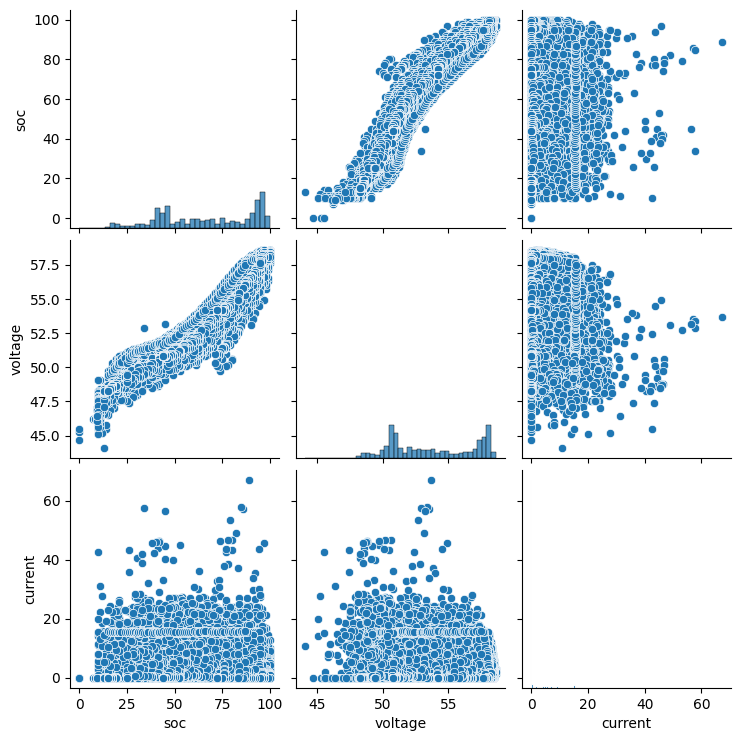

In [ ]:
sns.pairplot(df)

**Insights**
1. SOC vs. Voltage: A strong positive correlation exists—higher SOC corresponds to higher voltage.
2. Current vs. SOC/Voltage: Current seems influenced by external load conditions.
3. Current Distribution: Mostly near 0 with occasional high-load spikes.
4. SOC Distribution: Skewed towards higher values, indicating the battery is often at high charge levels.
5. Voltage Distribution: Concentrated between 50 and 57 volts, aligning with typical battery operations.

#Normal Distribution Plot for Features

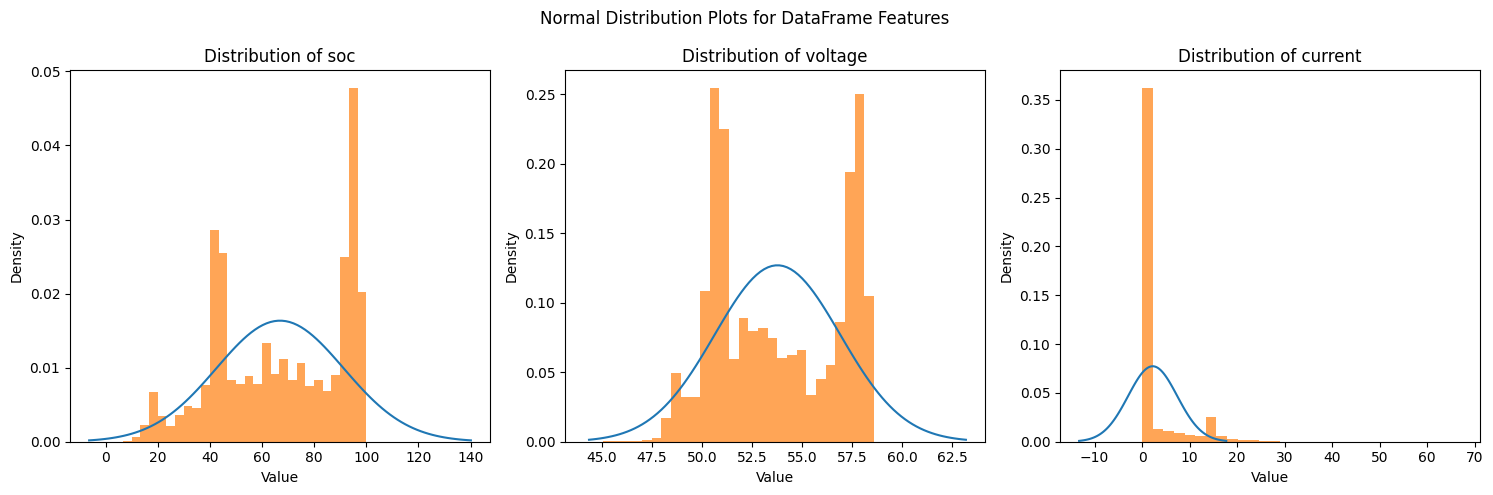

In [ ]:
features = ['soc', 'voltage', 'current']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Normal Distribution Plots for DataFrame Features')

for i, feature in enumerate(features):
    data = df[feature]
    mean = np.mean(data)
    std = np.std(data)

    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    y = stats.norm.pdf(x, mean, std)

    axs[i].plot(x, y)
    axs[i].hist(data, density=True, alpha=0.7, bins=30)
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

none of them is normal but soc and voltage is somewhat normal.

#Outlier detection through Z-Score

### Function for detecting outliers of any Column Using Z_Score

In [ ]:
def detecting_out(ColumnName):
  threshold = 3
  #I have taken Threshold =3 because it will include about 99.7%(+-3sigma) of the values which is comes under 6 sigma
  mean = df[ColumnName].mean()
  std = df[ColumnName].std()
  z_scores = (df[ColumnName] - mean) / std
  outliers = (np.abs(z_scores) > threshold).sum()
  return print(f"Number of outliers in {ColumnName}: {outliers}")


In [ ]:
#Detecting outliers seperately
detecting_out('soc')
detecting_out('voltage')
detecting_out('current')

Number of outliers in soc: 0
Number of outliers in voltage: 1
Number of outliers in current: 821


We have not remove outliers from the current becaus outliers also carry the information and if we remove the outliers then there will be a chance of getting wrong information because current column having so many outliers. And its also depends on the problem that what needs to be done, And this problem doesn't required that.

In [ ]:
df.describe()

,timestamp,soc,voltage,current
count,48003,48003.000000,48003.000000,48003.000000
mean,2021-12-20 19:58:37.592650496,66.922151,53.770466,2.237152
min,2021-11-09 07:05:00,0.000000,44.100000,0.000000
25%,2021-11-29 00:53:00,45.000000,50.900000,0.000000
50%,2021-12-19 06:27:00,68.000000,53.200000,0.000000
75%,2022-01-12 05:42:00,93.000000,57.400000,0.500000
max,2022-01-31 17:12:00,100.000000,58.600000,67.100000
std,NaN,24.405035,3.141847,5.160074


#Further Checking the distribution with Histogram

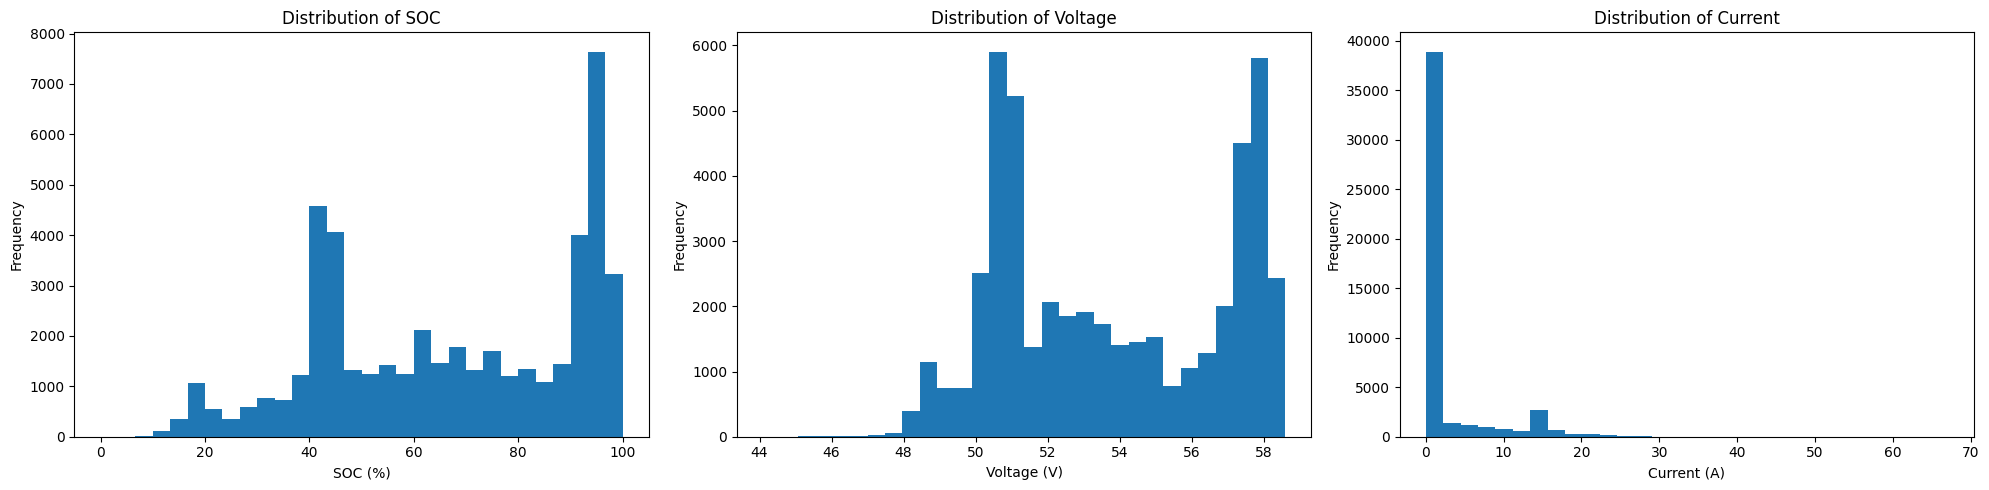

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20, 5))

axs[0].hist(df['soc'], bins=30)
axs[0].set_title('Distribution of SOC')
axs[0].set_xlabel('SOC (%)')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['voltage'], bins=30)
axs[1].set_title('Distribution of Voltage')
axs[1].set_xlabel('Voltage (V)')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['current'], bins=30)
axs[2].set_title('Distribution of Current')
axs[2].set_xlabel('Current (A)')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Algorithm to obtain the FECs


* The SOC change is calculated as the difference between consecutive SOC values:
ΔSOC[i]= SOC[i]-SOC[i-1]
* The total SOC change is computed by summing the absolute values of all SOC changes:
SOC[total]= sigma(i=1 to n)|ΔSOC[i]|
* FEC is calculated by dividing the total SOC change by 200% (representing a full cycle from 0% to 100% and back):
FEC=SOC[total]/200

In [ ]:
df['soc_change'] = df['soc'].diff()  # Computing SOC change
df['charge_current'] = np.where(df['soc_change'] > 0, df['current'], 0)  # Only count charging current
df['charge_current'] = df['charge_current'].abs()  # Ensure positive values
df['charge_current'].fillna(0, inplace=True)  # Handle NaN

#COMPUTE FULL EQUIVALENT CYCLES (FEC)
soc_cycle_counts = df['soc_change'].abs().sum()  # Total SOC change over all cycles
fec = soc_cycle_counts / 200

# Printing the final result
print(f"Total SOC Change: {soc_cycle_counts:.2f}")
print(f"Full Equivalent Cycles (FEC): {fec:.2f}")


Total SOC Change: 10507.00
Full Equivalent Cycles (FEC): 52.53


# Capacity Calculation

* It is possible to estimate the capacity of the battery in Ampere hours (Ah) using the given data.
* Using the charging current and time intervals, the capacity can be calculated for each full equivalent cycle.

In [ ]:
df['time_diff'] = df['timestamp'].diff().dt.total_seconds() / 3600

# Calculate capacity increment for each time step (in Ah)
df['capacity_increment'] = df['current'] * df['time_diff']

# Initialize variables
cycle_capacities = []
cycle_start_index = 0
cycle_count = 0

# Iterate through the data to find cycles and calculate capacity
for i in range(1, len(df)):
    if df['soc'].iloc[i] < df['soc'].iloc[i-1]:
        # End of charge cycle detected
        cycle_capacity = df['capacity_increment'].iloc[cycle_start_index:i].sum()
        cycle_capacities.append(abs(cycle_capacity))
        cycle_start_index = i
        cycle_count += 1

        if cycle_count == 10:
            break

# Calculate average capacity over the first ten cycles
average_capacity = np.mean(cycle_capacities)

print(f"Average battery capacity over the first ten cycles: {average_capacity:.2f} Ah")

Average battery capacity over the first ten cycles: 0.71 Ah


# Summery of the Data Analysis
Data Loading and Cleaning:
1. First I imported the libraries and then load the data, by looking the head of the data I identify that there is one column which is unnamed so i remove that because that was of index column.
2. Then I checked for missing values but not found any.
3. Then I short the data according to time.
4. For outliers first I plot the boxplot and observe that almost all the outliers are in the current column.
5. After observe the sorted data and box plot I understood that there is two rows which have 0 values and taken in 51 years back which is irrelevant so I removed those rows and I saw that now voltage is not have the outlier.
5. Then I checked for duplicated values and found 33135 so i remove the duplicate values because all have the same values.
6. Then I further check for the outliers by IQR and z score and found that only current have outliers I do not want to remove because they have significant amount of information.
7. Then I visualize the data.
8. Then I have calculated the FEC and Capacity value.